# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies

import requests
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from citipy import citipy
from api_keys import weather_api_key

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "castro"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

## Generate Cities List

In [3]:
# Generate random list
lat=np.random.uniform(low=-90, high=90, size=1500)
lat

array([-25.84951622,  56.925413  , -83.13391265, ...,  54.27420969,
       -66.16537752,  35.73918338])

In [4]:
lon=np.random.uniform(low=-180, high=180, size=1500)
lon

array([ -64.41286204, -143.48669985, -151.58170805, ..., -143.25655995,
       -116.83128091, -130.97697   ])

In [5]:
cities = []
positions= list(zip(lat,lon))
#positions

for position in positions:
   
    city = citipy.nearest_city(position[0], position[1]).city_name
    if city not in cities:
        cities.append(city)

In [6]:
#print(cities)

In [7]:
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [9]:
weather_api_key

'ef947681f26f8df1851951dae43c66d8'

In [10]:
# Build query URL
query1_url = f"{url}appid={weather_api_key}&units={units}&q="
query1_url

'http://api.openweathermap.org/data/2.5/weather?appid=ef947681f26f8df1851951dae43c66d8&units=metric&q='

In [11]:
# Define Variables

city_name_list = []
city_id_list = []
cloudiness_list = []
date_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lon_list = []
date_temp_list = []
max_temp_list = []
wind_speed_list = []

index_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#query_url
query_url = f"{url}appid={weather_api_key}&units={units}&q="


for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        
        
        
        city_name_list.append(response["name"])
        city_id_list.append(response["id"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lon_list.append(response["coord"]["lon"])
        date_temp_list.append(response['main']['temp'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} : {city}")
        
    except(KeyError, IndexError):
            
        print("City not found. Skipping .....")
            
        pass
            
        
        

Processing Record 1 : tucuman
Processing Record 2 : haines junction
Processing Record 3 : mataura
Processing Record 4 : ushuaia
Processing Record 5 : bredasdorp
Processing Record 6 : saint-philippe
Processing Record 7 : vila franca do campo
Processing Record 8 : catuday
City not found. Skipping .....
Processing Record 9 : pevek
Processing Record 10 : amguri
Processing Record 11 : hermanus
Processing Record 12 : saldanha
Processing Record 13 : tuatapere
Processing Record 14 : cayenne
Processing Record 15 : east london
Processing Record 16 : tuktoyaktuk
Processing Record 17 : necochea
Processing Record 18 : kaitangata
Processing Record 19 : valdivia
Processing Record 20 : cape town
Processing Record 21 : rikitea
Processing Record 22 : castro
Processing Record 23 : ampanihy
Processing Record 24 : saint george
Processing Record 25 : kudahuvadhoo
Processing Record 26 : cherskiy
Processing Record 27 : qaanaaq
Processing Record 28 : bethel
Processing Record 29 : kapaa
Processing Record 30 : v

Processing Record 227 : along
Processing Record 228 : kununurra
Processing Record 229 : norman wells
Processing Record 230 : traverse city
Processing Record 231 : thinadhoo
Processing Record 232 : belmonte
Processing Record 233 : andapa
Processing Record 234 : alofi
Processing Record 235 : omsukchan
Processing Record 236 : sovetskiy
Processing Record 237 : carnarvon
Processing Record 238 : winchester
Processing Record 239 : san vicente
City not found. Skipping .....
Processing Record 240 : olafsvik
Processing Record 241 : victoria
Processing Record 242 : tura
Processing Record 243 : hilo
Processing Record 244 : duluth
Processing Record 245 : san quintin
Processing Record 246 : mount gambier
City not found. Skipping .....
Processing Record 247 : kotli loharan
Processing Record 248 : shiyan
Processing Record 249 : torbay
Processing Record 250 : fernie
Processing Record 251 : olga
City not found. Skipping .....
Processing Record 252 : zhanaozen
Processing Record 253 : staryy nadym
City no

Processing Record 460 : kargasok
City not found. Skipping .....
Processing Record 461 : howard springs
Processing Record 462 : calabozo
City not found. Skipping .....
City not found. Skipping .....
City not found. Skipping .....
Processing Record 463 : whitehorse
Processing Record 464 : gladstone
Processing Record 465 : bako
Processing Record 466 : kunashak
Processing Record 467 : dali
Processing Record 468 : merzifon
Processing Record 469 : narathiwat
Processing Record 470 : fuente de oro
Processing Record 471 : dingle
Processing Record 472 : constantine
Processing Record 473 : saskylakh
Processing Record 474 : ulladulla
Processing Record 475 : rochegda
Processing Record 476 : minsk
Processing Record 477 : cururupu
Processing Record 478 : gimli
Processing Record 479 : bukowno
Processing Record 480 : gloucester
Processing Record 481 : timaru
Processing Record 482 : tochigi
Processing Record 483 : rondonopolis
Processing Record 484 : hanmer springs
Processing Record 485 : bardiyah
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_check = pd.DataFrame({"city" : city_name_list, "City ID" : city_id_list, "Country" : country_list, "Latitude" : lat_list,
                             "Longitude" : lon_list, "Date" : date_list, "Cloudiness" : cloudiness_list, "Humidity" : humidity_list,
                             "Temperature at Date" : date_temp_list, "Max Temp to Date" : max_temp_list, "Wind Speed" : wind_speed_list})

weather_check

,city,City ID,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Temperature at Date,Max Temp to Date,Wind Speed
0,San Miguel de Tucumán,3836873,AR,-26.82,-65.22,1603522973,90,73,24.00,24.00,1.00
1,Haines Junction,5969025,CA,60.75,-137.51,1603522974,100,83,-6.48,-6.48,0.61
2,Mataura,6201424,NZ,-46.19,168.86,1603522974,100,55,18.89,18.89,4.47
3,Ushuaia,3833367,AR,-54.80,-68.30,1603522974,75,80,4.00,4.00,2.10
4,Bredasdorp,1015776,ZA,-34.53,20.04,1603522974,99,88,20.00,20.00,2.10
...,...,...,...,...,...,...,...,...,...,...,...
562,Fare,4034496,PF,-16.70,-151.02,1603523112,100,68,26.74,26.74,2.27
563,Homer,5864145,US,59.64,-151.55,1603523113,90,93,5.00,5.00,3.26
564,Dongsheng,1812256,CN,39.82,109.98,1603523113,55,36,13.49,13.49,6.05
565,Pryvillya,696218,UA,49.02,38.30,1603523113,100,83,14.39,14.39,4.29


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
humidity_less_than_100 = weather_check.loc[(weather_check["Humidity"] <= 100)]

humidity_less_than_100

,city,City ID,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Temperature at Date,Max Temp to Date,Wind Speed
0,San Miguel de Tucumán,3836873,AR,-26.82,-65.22,1603522973,90,73,24.00,24.00,1.00
1,Haines Junction,5969025,CA,60.75,-137.51,1603522974,100,83,-6.48,-6.48,0.61
2,Mataura,6201424,NZ,-46.19,168.86,1603522974,100,55,18.89,18.89,4.47
3,Ushuaia,3833367,AR,-54.80,-68.30,1603522974,75,80,4.00,4.00,2.10
4,Bredasdorp,1015776,ZA,-34.53,20.04,1603522974,99,88,20.00,20.00,2.10
...,...,...,...,...,...,...,...,...,...,...,...
562,Fare,4034496,PF,-16.70,-151.02,1603523112,100,68,26.74,26.74,2.27
563,Homer,5864145,US,59.64,-151.55,1603523113,90,93,5.00,5.00,3.26
564,Dongsheng,1812256,CN,39.82,109.98,1603523113,55,36,13.49,13.49,6.05
565,Pryvillya,696218,UA,49.02,38.30,1603523113,100,83,14.39,14.39,4.29


In [14]:
#  Get the indices of cities that have humidity over 100%.
humidity_more_than_100 = weather_check.loc[(weather_check["Humidity"] > 100)]

humidity_more_than_100

,city,City ID,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Temperature at Date,Max Temp to Date,Wind Speed


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


quartiles = humidity_less_than_100["Humidity"].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

clean_city_data = humidity_less_than_100 = weather_check.loc[(weather_check["Humidity"] > lower_bound)
                                                             |(weather_check["Humidity"] < upper_bound) ]

clean_city_data

# export into csv file

clean_city_data.to_csv("output_data/cities.csv", index = False, header = True)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

10/24/20


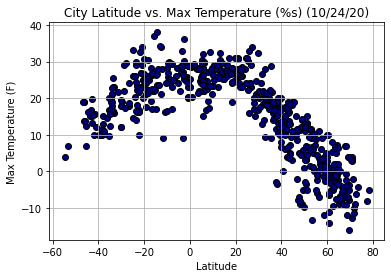

In [35]:
sysdate = datetime.datetime.now()
print(sysdate.strftime("%m/%d/%y"))
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp to Date"], marker = "o", facecolor ="navy", edgecolor = "black")
plt.title(f"City Latitude vs. Max Temperature (%s) (" +sysdate.strftime("%m/%d/%y")+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_Data/Images/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

10/24/20


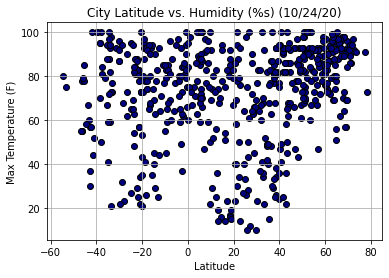

In [36]:
sysdate = datetime.datetime.now()
print(sysdate.strftime("%m/%d/%y"))
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker = "o", facecolor ="navy", edgecolor = "black")
plt.title(f"City Latitude vs. Humidity (%s) (" +sysdate.strftime("%m/%d/%y")+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_Data/Images/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

10/24/20


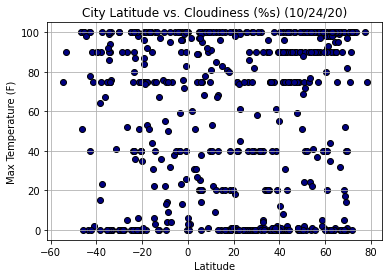

In [37]:
sysdate = datetime.datetime.now()
print(sysdate.strftime("%m/%d/%y"))

plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker = "o", facecolor ="navy", edgecolor = "black")
plt.title(f"City Latitude vs. Cloudiness (%s) (" +sysdate.strftime("%m/%d/%y")+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_Data/Images/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

10/24/20


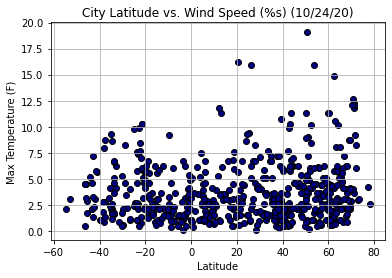

In [38]:
sysdate = datetime.datetime.now()
print(sysdate.strftime("%m/%d/%y"))

plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker = "o", facecolor ="navy", edgecolor = "black")
plt.title(f"City Latitude vs. Wind Speed (%s) (" +sysdate.strftime("%m/%d/%y")+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_Data/Images/wind_speed.png")
plt.show()

## Linear Regression

In [20]:
# Northern and Southern Hemisphere DataFrames

northern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] >=0,:]
southern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] < 0,:]

In [21]:
# Define function for creating linear regression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# funtion for annotation

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


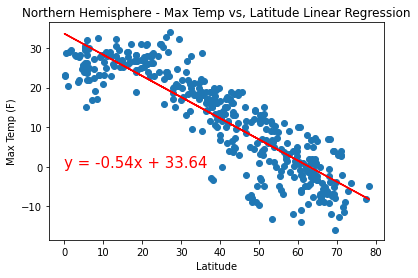

In [22]:

# function #1

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Max Temp to Date"])

# annotate function

annotate(equation, 0, 0)

#Title

plt.title("Northern Hemisphere - Max Temp vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Max Temp (F)")

# save fig 

plt.savefig("output_data/Images/NorthHem_MaxTempVsLatLinearRegression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.64


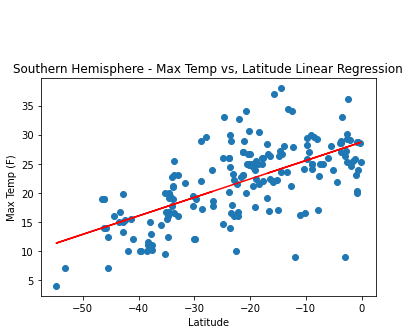

In [23]:
# function #1

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Max Temp to Date"])

# annotate function

annotate(equation, -30, 50)

#Title

plt.title("Southern Hemisphere - Max Temp vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Max Temp (F)")

# save fig 

plt.savefig("output_data/Images/SouthHem_MaxTempVsLatLinearRegression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.31


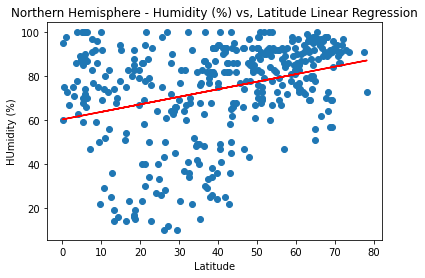

In [24]:
# function #1

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])

# annotate function

annotate(equation, 0, 0)

#Title

plt.title("Northern Hemisphere - Humidity (%) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("HUmidity (%)")

# save fig 

plt.savefig("output_data/Images/NorthHem_HumidityVsLatLinearRegression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.04


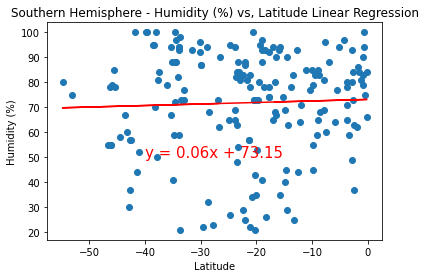

In [25]:
# function #1

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])

# annotate function

annotate(equation, -40, 50)

#Title

plt.title("Southern Hemisphere - Humidity (%) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Humidity (%)")

# save fig 

plt.savefig("output_data/Images/SouthHem_HumidityVsLatLinearRegression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.14


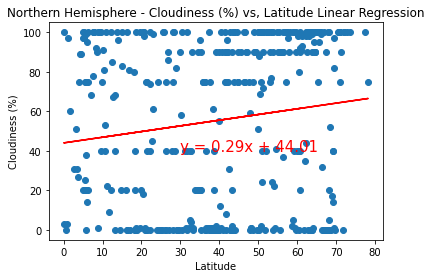

In [26]:
# function #1

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])

# annotate function

annotate(equation, 30, 40)

#Title

plt.title("Northern Hemisphere - Cloudiness (%) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Cloudiness (%)")

# save fig 

plt.savefig("output_data/Images/NorthHem_CloudinessVsLatLinearRegression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.01


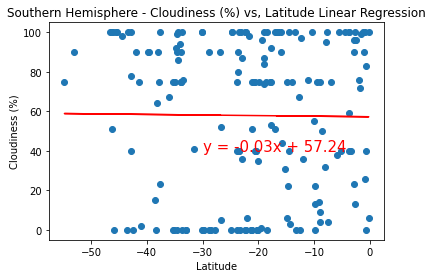

In [27]:
# function #1

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])

# annotate function

annotate(equation, -30, 40)

#Title

plt.title("Southern Hemisphere - Cloudiness (%) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Cloudiness (%)")

# save fig 

plt.savefig("output_data/Images/SouthHem_CloudinessVsLatLinearRegression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.16


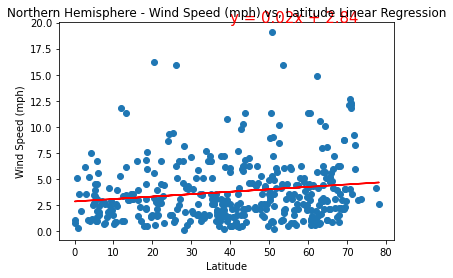

In [28]:
# function #1

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"])

# annotate function

annotate(equation, 40, 20)

#Title

plt.title("Northern Hemisphere - Wind Speed (mph) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Wind Speed (mph)")

# save fig 

plt.savefig("output_data/Images/NorthHem_WindSpeedVsLatLinearRegression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.13


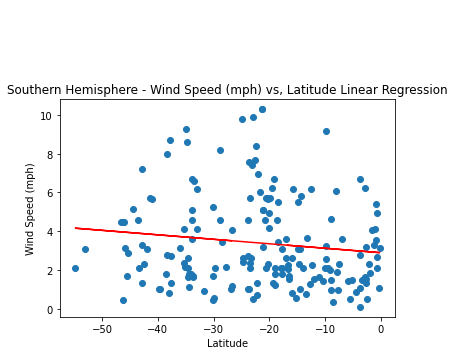

In [29]:
# function #1

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"])

# annotate function

annotate(equation, -30, 15)

#Title

plt.title("Southern Hemisphere - Wind Speed (mph) vs, Latitude Linear Regression")

#set x label

plt.xlabel("Latitude")

#set y label

plt.ylabel("Wind Speed (mph)")

# save fig 

plt.savefig("output_data/Images/SouthHem_WindSpeedVsLatLinearRegression.png")

In [30]:
print ("Comment:")

print(f"             ")

print(f"Since the r-squared is closer to zero or negative in some cases, the Humidity, Cloudiness and Wind Speed cannot be explianed by City Latitudes in both Hemispheres.")
print(f"There seems to a strong corrleation of temperatures and latitudes in both hemispheres.")
print(f"The r squared for Souther Hemisphere shows that Temperature increase with increase in Latitude.")
      

Comment:
             
Since the r-squared is closer to zero or negative in some cases, the Humidity, Cloudiness and Wind Speed cannot be explianed by City Latitudes in both Hemispheres.
There seems to a strong corrleation of temperatures and latitudes in both hemispheres.
The r squared for Souther Hemisphere shows that Temperature increase with increase in Latitude.
